In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from config import g_key
from rossmo_et_ridgway import Rossmo

### Notes

* Ridgway notes need to be combined with csv sheets, methinks. 
    * https://docs.google.com/spreadsheets/d/1NHHZEL_3UaFRxgpGcsWyooXnLL-YStYilmb8TJ-JMC4/edit#gid=0
    
* max_distance() in rossmo_et_ridgway needs to exclude outliers, e.g. the max distance for ridgway is 160 miles, which gives a HUGE radius. 
* I also need to review how to scale the heatmap better -- perhaps normalize the output from 0 to 1. 

* Gmaps doc
    * https://jupyter-gmaps.readthedocs.io/en/latest/api.html

In [ ]:
body_locations_path = '../resources/Ridgway/body_locations.csv'
disappearances_path = '../resources/Ridgway/disappearances.csv'
ridgway_locations_path = '../resources/Ridgway/ridgway_locations.csv'

df_victims = pd.read_csv(body_locations_path)
df_disappearances = pd.read_csv(disappearances_path)
df_ridgway = pd.read_csv(ridgway_locations_path)

df_disappearances['coordinates'] = list(zip(df_disappearances['Y'], df_disappearances['X']))

In [ ]:
df_disappearances.sample(5)

,X,Y,Name,description,coordinates
1,-122.304973,47.612925,Andrea Marion Childers,NaN,"(47.6129248, -122.304973)"
7,-122.326415,47.592023,Colleen Renee Brockman,NaN,"(47.5920232, -122.3264155)"
40,-122.284543,47.473157,Terry Rene Milligan,NaN,"(47.4731566, -122.2845425)"
15,-122.284547,47.473158,Denise Darcel Bush,NaN,"(47.4731576, -122.2845467)"
22,-122.277116,47.549709,Lisa Yates,NaN,"(47.5497095, -122.2771163)"


In [ ]:
R = Rossmo(df_disappearances['coordinates'].to_list(), accuracy=100)

In [ ]:
rossmo_results = R.rossmo_results

In [ ]:
df_rossmo_results = pd.DataFrame({'coordinates': rossmo_results.keys(), 'score': rossmo_results.values()})

In [ ]:
df_rossmo_results['score_normalized'] = (
    (df_rossmo_results['score'] - df_rossmo_results['score'].min()) / (df_rossmo_results['score'].max() - df_rossmo_results['score'].min()) 
) # * 100
df_rossmo_results.sample(5)

,coordinates,score,score_normalized
3602,"(47.293597343900316, -121.61633778440218)",47.640623,0.045443
2443,"(47.123546094033934, -122.26390828087395)",70.903185,0.136662
6526,"(47.70455453107741, -121.99540344087346)",63.835404,0.108947
7441,"(47.832092968477205, -122.232319476168)",72.766834,0.143969
4990,"(47.47781953125557, -123.00624519146355)",50.924649,0.058321


In [ ]:
stats = df_rossmo_results['score'].describe()
stats

count    10000.000000
mean        57.238645
std         18.523103
min         36.051665
25%         45.808452
50%         52.087252
75%         62.081477
max        291.072206
Name: score, dtype: float64

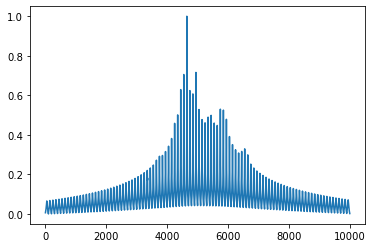

<Figure size 2160x1584 with 0 Axes>

In [ ]:
df_rossmo_results['score_normalized'].plot()
plt.figure(figsize=(30,22))
plt.show()

In [ ]:
# set normalized score for score values below q1 to 0.0
q1 = stats['25%']
df_rossmo_results.loc[df_rossmo_results['score'] <= q1, ['score_normalized']] = 0.0

In [ ]:
df_rossmo_results.loc[df_rossmo_results['score_normalized'] > 0].sort_values(by='score_normalized', ascending=False).head(5)

,coordinates,score,score_normalized
4645,"(47.43530671878897, -122.29549708557988)",291.072206,1.000000
4944,"(47.47781953125557, -122.27970268322692)",218.596176,0.715803
4545,"(47.42113578130011, -122.29549708557988)",215.917752,0.705300
4445,"(47.40696484381124, -122.29549708557988)",196.452024,0.628970
4745,"(47.449477656277836, -122.29549708557988)",195.150791,0.623868


In [ ]:
from mapping_helper_functions import convert_latitude_to_webmercator, convert_longitude_to_webmercator

df_rossmo_results[['latitude', 'longitude']] = pd.DataFrame(df_rossmo_results['coordinates'].tolist(), index=df_rossmo_results.index)
df_rossmo_results

df_rossmo_results['latitude_webmercator'] = convert_latitude_to_webmercator(df_rossmo_results['latitude'])
df_rossmo_results['longitude_webmercator'] = convert_longitude_to_webmercator(df_rossmo_results['longitude'])

In [ ]:
df_rossmo_results

,coordinates,score,score_normalized,latitude,longitude,latitude_webmercator,longitude_webmercator
0,"(46.78344359430116, -121.58474897969623)",37.561729,0.0,46.783444,-121.584749,5.906798e+06,-1.353475e+07
1,"(46.78344359430116, -121.6005433820492)",37.770950,0.0,46.783444,-121.600543,5.906798e+06,-1.353651e+07
2,"(46.78344359430116, -121.61633778440218)",37.983726,0.0,46.783444,-121.616338,5.906798e+06,-1.353827e+07
3,"(46.78344359430116, -121.63213218675514)",38.200158,0.0,46.783444,-121.632132,5.906798e+06,-1.354003e+07
4,"(46.78344359430116, -121.64792658910811)",38.420352,0.0,46.783444,-121.647927,5.906798e+06,-1.354179e+07
...,...,...,...,...,...,...,...
9995,"(48.18636640569884, -123.0852172032284)",37.290932,0.0,48.186366,-123.085217,6.137916e+06,-1.370178e+07
9996,"(48.18636640569884, -123.10101160558136)",37.089456,0.0,48.186366,-123.101012,6.137916e+06,-1.370354e+07
9997,"(48.18636640569884, -123.11680600793433)",36.891229,0.0,48.186366,-123.116806,6.137916e+06,-1.370530e+07
9998,"(48.18636640569884, -123.13260041028731)",36.696165,0.0,48.186366,-123.132600,6.137916e+06,-1.370706e+07


In [ ]:
# test: repeat rows a number of times to troubleshoot hexbins
# df_rossmo_results  = df_rossmo_results.loc[df_rossmo_results.index.repeat(df_rossmo_results['score_normalized'])].reset_index(drop=True)

In [ ]:
df_rossmo_results['size_mapper'] = df_rossmo_results['score_normalized'] * 10

In [72]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.transform import linear_cmap, transform
from bokeh.tile_providers import CARTODBPOSITRON_RETINA, get_provider
from bokeh.models import ColumnDataSource, HoverTool

# show map in notebook
output_notebook()

tile_provider = get_provider(CARTODBPOSITRON_RETINA)

source = ColumnDataSource.from_df(df_rossmo_results)

x_range = df_rossmo_results['longitude_webmercator'].min(), df_rossmo_results['longitude_webmercator'].max()  # lon
y_range = df_rossmo_results['latitude_webmercator'].min(), df_rossmo_results['latitude_webmercator'].max() # lat

x_image_anchor = df_rossmo_results['longitude_webmercator'].median() # these are definitely not correct
y_image_anchor = df_rossmo_results['latitude_webmercator'].median() # these are definitely not correct



# range bounds supplied in web mercator coordinates
p = figure(
    x_range=x_range, 
    y_range=y_range,
    x_axis_type='mercator', 
    y_axis_type='mercator',
    match_aspect=True,
    lod_threshold=None
)
p.add_tile(tile_provider)


d = score_array

p.image(
    image=[d], 
    x=x_range[0], 
    y=y_range[0], 
    dw=abs(x_range[1] - x_range[0]), 
    dh=abs(y_range[1] - y_range[0]), 
    palette='Spectral11',  
    alpha=0.5
)
p.grid.grid_line_width = 0.5

show(p)

Loading BokehJS ...

In [71]:
, 

(231117.8438776303, 174064.25790435448)

In [63]:
# https://github.com/bokeh/bokeh/issues/4786#issuecomment-375730134

I need an n-by-n array in the shape of the map area of interest. The values of the array should correspond to the score values. 

quick mock:
    - np.zeros((n,n)) - (n does not == n in this example; n is just for demo purposes)
    - reshape array to the correct shape 
        - is zeros necessary if I'm going to reshape the array anway? 


In [ ]:
score_array = df_rossmo_results['score_normalized'].to_numpy().reshape((100, 100))

In [48]:
score_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
import numpy as np

from bokeh.plotting import figure, output_file, show

d = score_array

p = figure(width=400, height=400)
p.x_range.range_padding = p.y_range.range_padding = 0

p.image(image=[d], x=0, y=0, dw=100, dh=100, palette="Spectral11", level="image", alpha=[])
p.grid.grid_line_width = 0.5

show(p)

### Hover-over & Tool-tip notes / documentation

In [ ]:
# p.add_tools(HoverTool(
#     show_arrow=True,mode="mouse", point_policy="follow_mouse", renderers=[r]
# ))

# https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#userguide-tools-image-hover

In [ ]:
anchor = Either(
        Enum(Anchor),
        Tuple(Either(Enum(Align), Enum(HAlign), Percent),
              Either(Enum(Align), Enum(VAlign), Percent)), default="bottom_left", help="""
    Position of the image should be anchored at the `x`, `y` coordinates.
    """)